### Importing the Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the data 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy() 

### Lenght of the Time Period

In [3]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp.date.describe()

count           6269
unique          6269
top       21/11/2014
freq               1
Name: date, dtype: object

### From Text to Date

In [6]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)

In [7]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [8]:
df_comp.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

### Setting the Index

In [9]:
df_comp.set_index("date", inplace=True)

In [10]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [11]:
#df_comp.date.describe() #Expect to get an error message because we no longer have a "date" column since it is the index

### Setting the Desired Frequency

In [12]:
df_comp=df_comp.asfreq('d')

In [13]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [14]:
df_comp=df_comp.asfreq('b')

In [15]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Handling Missing Values

In [16]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [17]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [18]:
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [19]:
df_comp.spx=df_comp.spx.fillna(method='ffill')

In [20]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [21]:
df_comp.ftse=df_comp.ftse.fillna(method='bfill')

In [22]:
df_comp.dax=df_comp.dax.fillna(value = df_comp.dax.mean())

In [23]:
df_comp.nikkei=df_comp.dax.fillna(method='bfill')

In [24]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Simplifying the Dataset

In [25]:
df_comp['market_value']=df_comp.spx

In [26]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,6080.063363,1288.642547
std,487.868210,2752.604984,1145.568370,2752.604984,487.868210
min,438.920000,1911.700000,2876.600000,1911.700000,438.920000
25%,992.715221,4070.460000,4487.880000,4070.460000,992.715221
50%,1233.761241,5774.380000,5663.300000,5774.380000,1233.761241
75%,1460.250000,7442.660000,6304.630175,7442.660000,1460.250000
max,2872.867839,13559.600000,7778.637689,13559.600000,2872.867839


In [27]:
del df_comp['spx']

In [28]:
df_comp.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,6080.063363,5423.690398,6080.063363,1288.642547
std,2752.604984,1145.568370,2752.604984,487.868210
min,1911.700000,2876.600000,1911.700000,438.920000
25%,4070.460000,4487.880000,4070.460000,992.715221
50%,5774.380000,5663.300000,5774.380000,1233.761241
75%,7442.660000,6304.630175,7442.660000,1460.250000
max,13559.600000,7778.637689,13559.600000,2872.867839


In [29]:
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

In [30]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


### Splitting the Data

In [31]:
size = int(len(df_comp)*0.8)

In [32]:
df = df_comp.iloc[:size]

In [33]:
df_test = df_comp.iloc[size:]

In [34]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [35]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


### White Noise

In [36]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(),
                     size = len(df))

In [37]:
df.loc[:,'wn'] = wn

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [38]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1091.774764
std,292.559287,292.660725
min,438.920000,-58.448133
25%,914.620000,899.775315
50%,1144.650000,1090.929089
75%,1316.280729,1286.717282
max,1570.252238,2267.746259


<function matplotlib.pyplot.show(*args, **kw)>

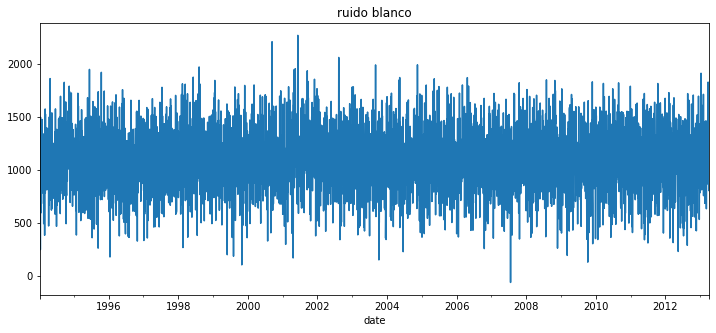

In [39]:
df.wn.plot(figsize = (12,5))
plt.title('ruido blanco')
plt.show

[]

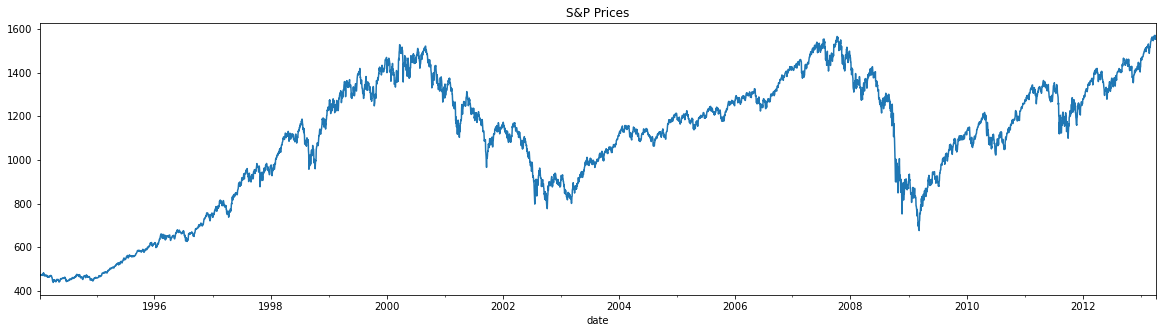

In [40]:
df.market_value.plot(figsize = (20,5))
plt.title('S&P Prices')
plt.plot()
#Comparación entre el ruido blanco y una grafica con estacionalidad

In [41]:
rw = pd.read_csv('RandWalk.csv')

In [42]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)

In [43]:
rw.set_index("date", inplace = True)

In [44]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [45]:
rw = rw.asfreq('b')

In [46]:
df.loc[:,'rw'] = rw.price

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [47]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,722.691382,1122.139662
1994-01-10,475.27,1115.648935,1080.347860
1994-01-11,474.13,1188.976465,1082.095245
1994-01-12,474.17,542.842751,1083.639265
1994-01-13,472.47,1248.796756,1067.146255


<function matplotlib.pyplot.show(*args, **kw)>

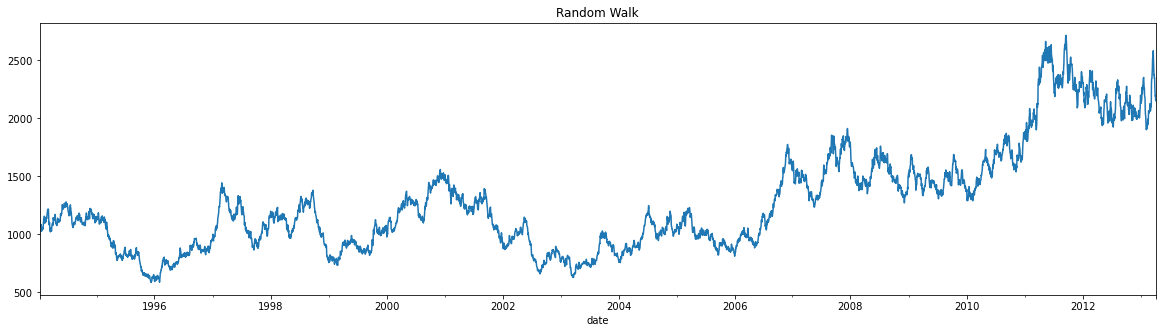

In [48]:
df.rw.plot(figsize = (20,5))
plt.title('Random Walk')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

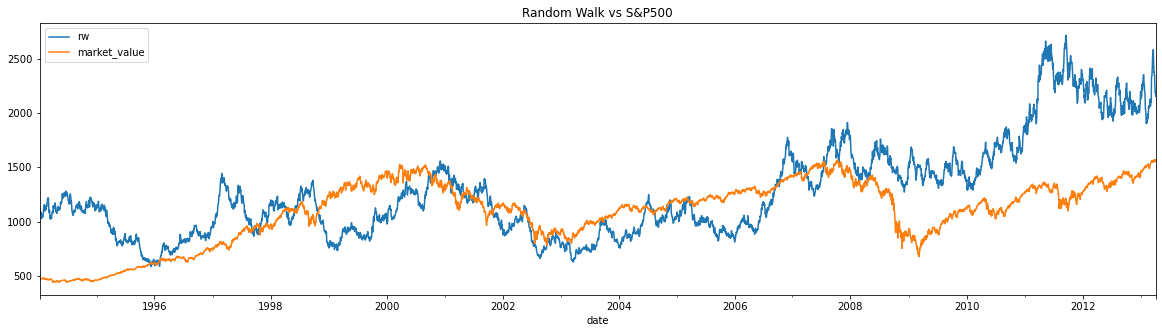

In [49]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title('Random Walk vs S&P500')
plt.legend()
plt.show

# **ESTACIONAREIDAD **

In [50]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
#Descomposición Estacional
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [51]:
#metodo adfulller -- contraste de hipotesis
#nos devuelve, el valor a considera
#p valor 
#retrasos
#significancias del 1 al 10% 
sts.adfuller(df.market_value)

(-1.7369847452352414,
 0.41216456967706333,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [52]:
sts.adfuller(df.wn)

(-71.9154189656089,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70804.1171943615)

In [53]:
sts.adfuller(df.rw)

(-1.3286073927689703,
 0.6159849181617391,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

# Estacionalidad

#Se divide en:





**Tendencia = Patrones**



**Estacionalidadd = Ciclico**





**Residual = Error de predicción entre datos reales y el modelo**

<function matplotlib.pyplot.show(*args, **kw)>

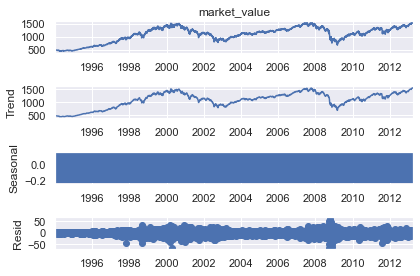

In [54]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show
#El resultado nos muestra serie de tiempo sin descomponer - luego los graficos de los 3 componentes
#de descomposición

<function matplotlib.pyplot.show(*args, **kw)>

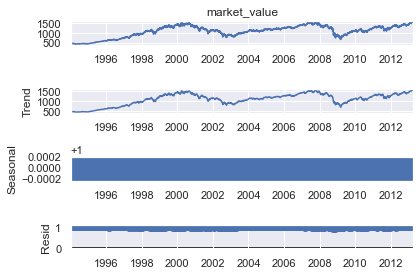

In [55]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model ="multiplicative")
s_dec_multiplicative.plot()
plt.show

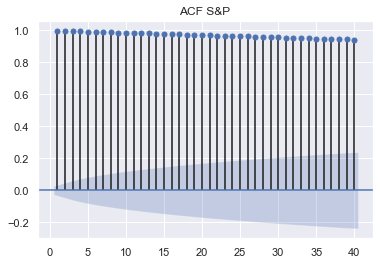

In [56]:
#dibujando función de autocorrelación (acf)
#lags = retrasos - - - num_argumento_retrasos
#zero = valor actual
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title('ACF S&P ')
plt.show()
#La grafica muestran los posibles valores del coeficiente de correlación (y), si todos van a más de 0
#hay correlación positiva
#Nota: Los valores del apartado azul miden que tan correlacionados pueden estar
#Nota 2: a mayor tiempo menor hay probabilidad de correlación

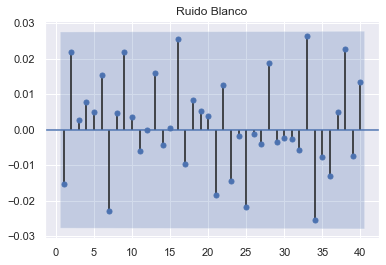

In [64]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
#si las lineas tocan la sección azul entonces los coeficientes no son significativos
#O sea que no hay correlación entre los retrasos
plt.title('Ruido Blanco')
plt.show()

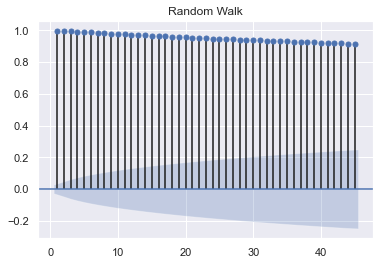

In [61]:
sgt.plot_acf(df.rw, lags = 45, zero = False)
plt.title('Random Walk')
plt.show()

# PACF = FUNCION DE CORRELACIÓN PARCIAL

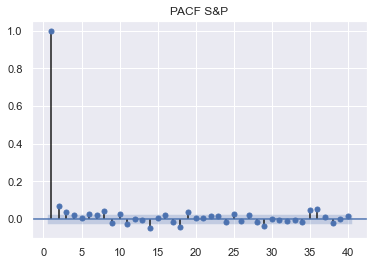

In [68]:
#el method es la metodologia que existe para calcular la parcial 
#Nota: ols = Minimos Cuadrados Ordinarios
#Nota 2 = correlación parcial ignora los valores indirectos
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title('PACF S&P')
plt.show()

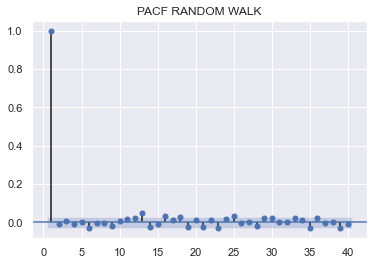

In [71]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title('PACF RANDOM WALK')
plt.show()

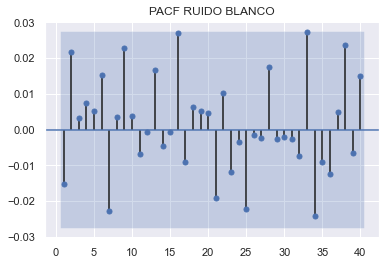

In [70]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title('PACF RUIDO BLANCO')
plt.show()